In [3]:
from notebook_ensemble_visualization import visualize_ensemble_result


## IQR 모델 앙상블 예측

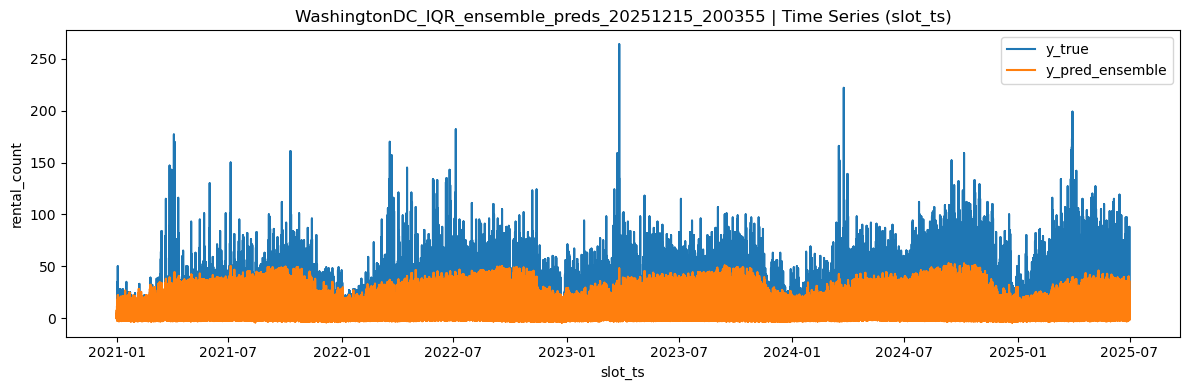

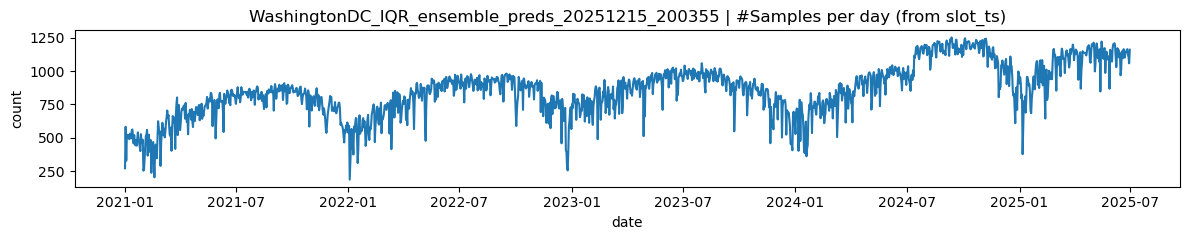

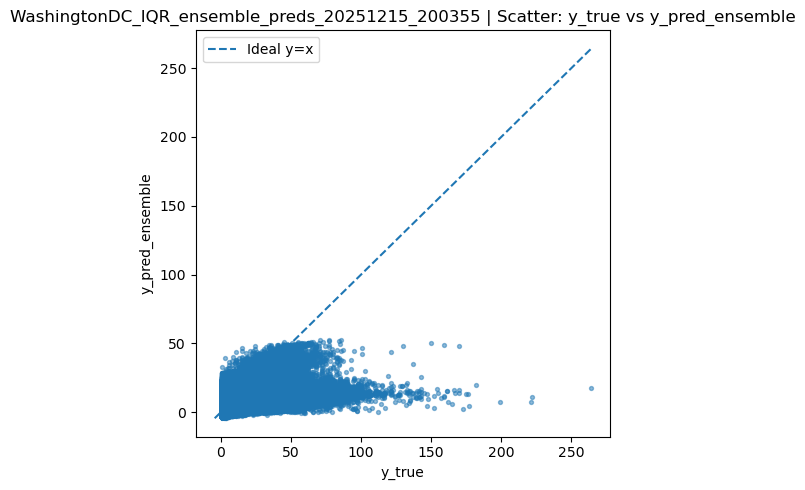

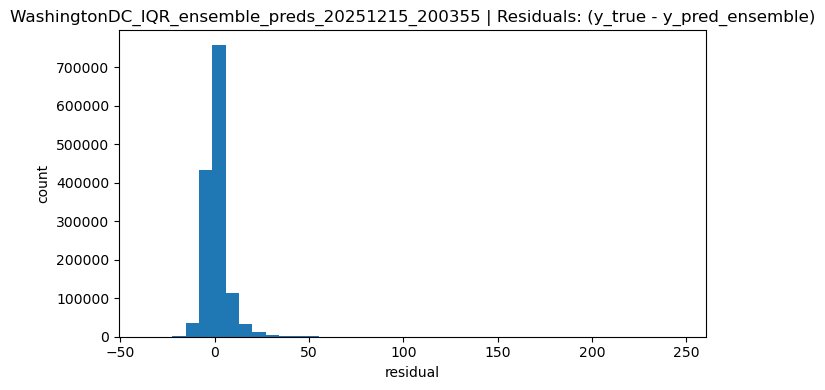

✅ Metrics (row-level) | RMSE=6.5850  MAE=3.8139  R2=0.3448


In [7]:
visualize_ensemble_result(
    csv_path="../../ensemble_result/WashingtonDC_IQR_ensemble_preds_20251215_200355.csv",
    date_col="date",
    pred_col="y_pred_ensemble",
    true_col="y_true",
)


/home/avg/PROJECT-Bicyle-Demand-Forecasting/notebooks/Report/notebook_ensemble_visualization.py:114: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/avg/anaconda3/envs/Apprentice-Project/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


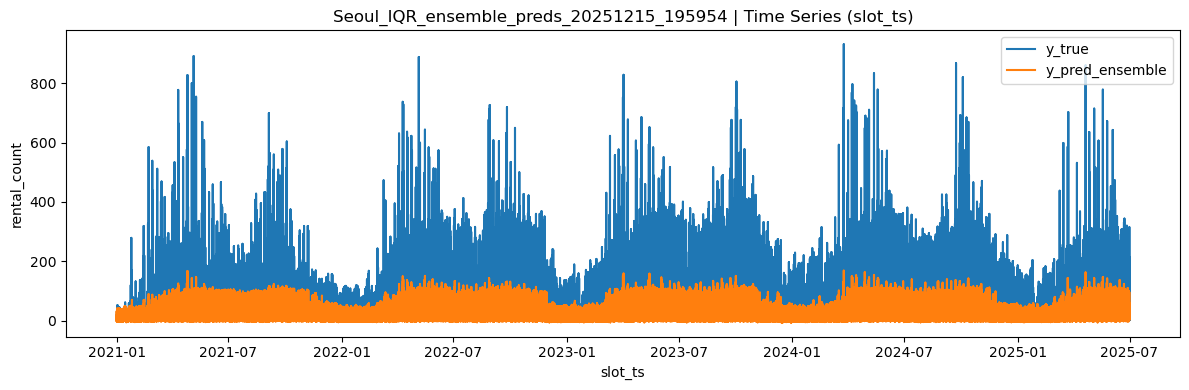

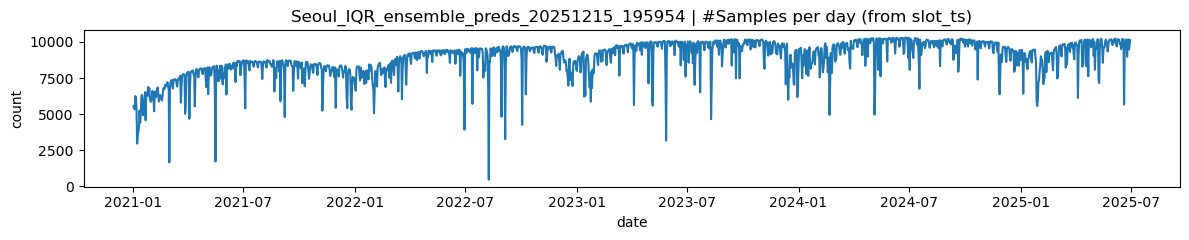

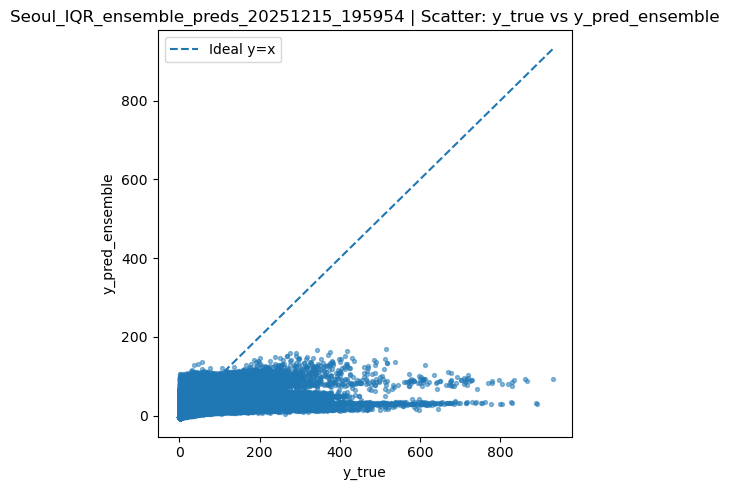

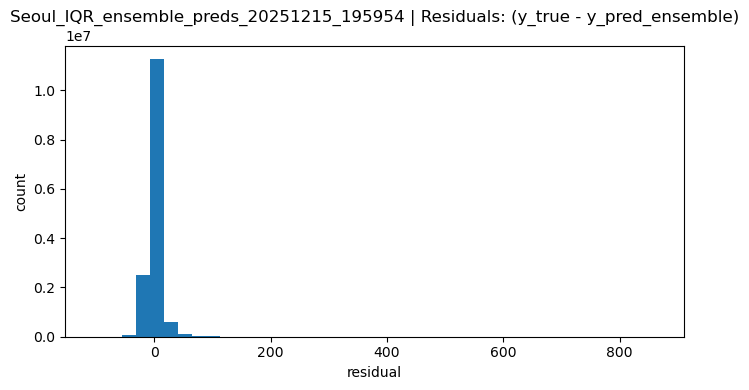

✅ Metrics (row-level) | RMSE=12.6626  MAE=7.2546  R2=0.3616


In [10]:
visualize_ensemble_result(
    csv_path="../../ensemble_result/Seoul_IQR_ensemble_preds_20251215_195954.csv",
    date_col="date",
    pred_col="y_pred_ensemble",
    true_col="y_true",
)


## NO_IQR 모델 앙상블 예측

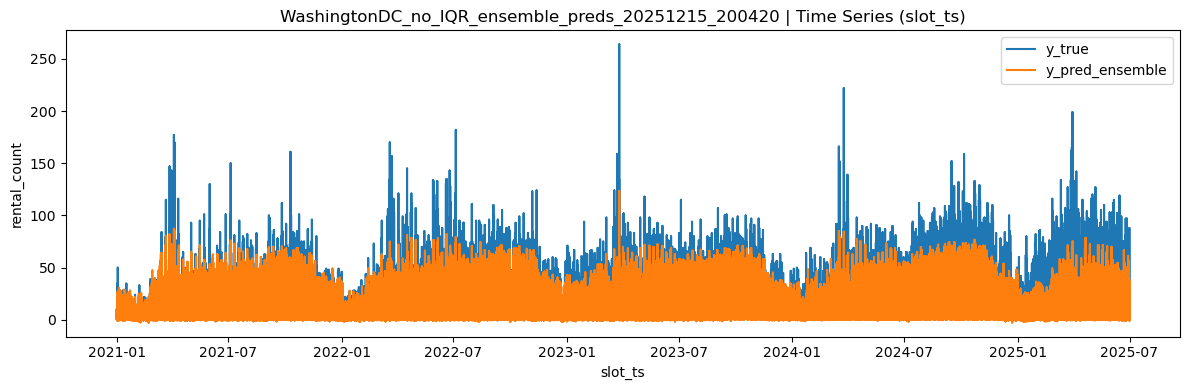

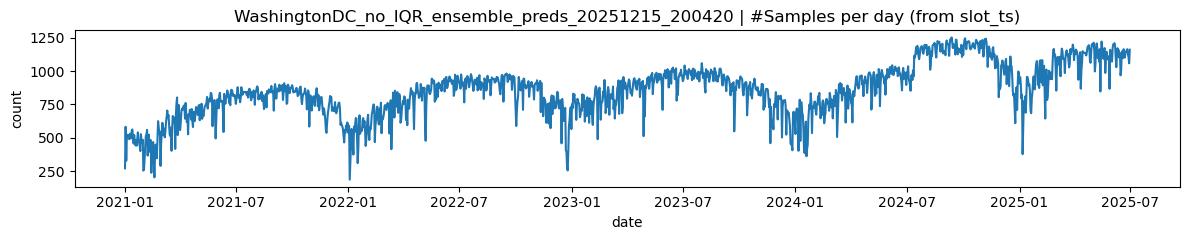

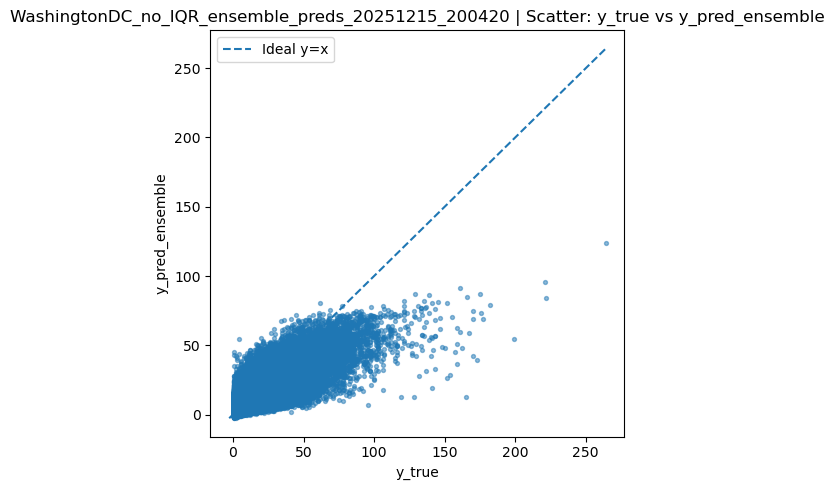

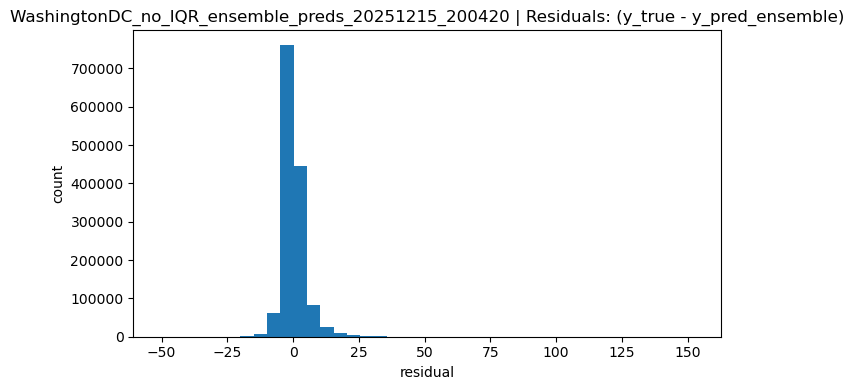

✅ Metrics (row-level) | RMSE=4.4142  MAE=2.6508  R2=0.7056


In [11]:
visualize_ensemble_result(
    csv_path="../../ensemble_result/WashingtonDC_no_IQR_ensemble_preds_20251215_200420.csv",
    date_col="date",
    pred_col="y_pred_ensemble",
    true_col="y_true",
)

/home/avg/PROJECT-Bicyle-Demand-Forecasting/notebooks/Report/notebook_ensemble_visualization.py:114: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/avg/anaconda3/envs/Apprentice-Project/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


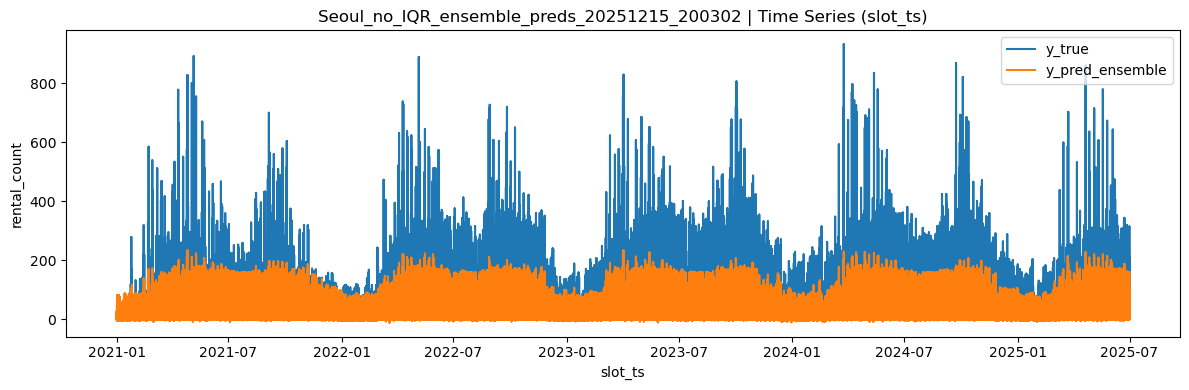

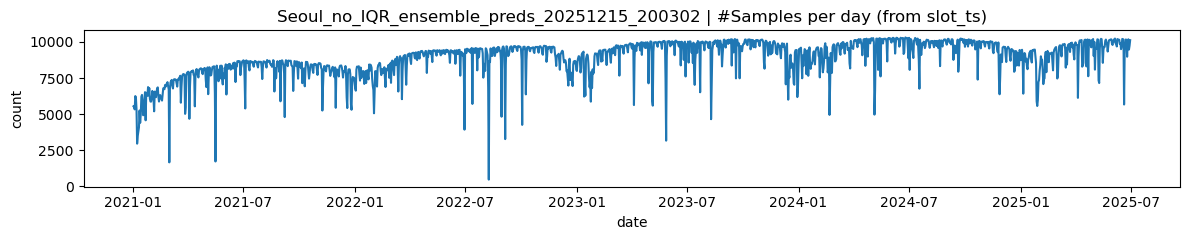

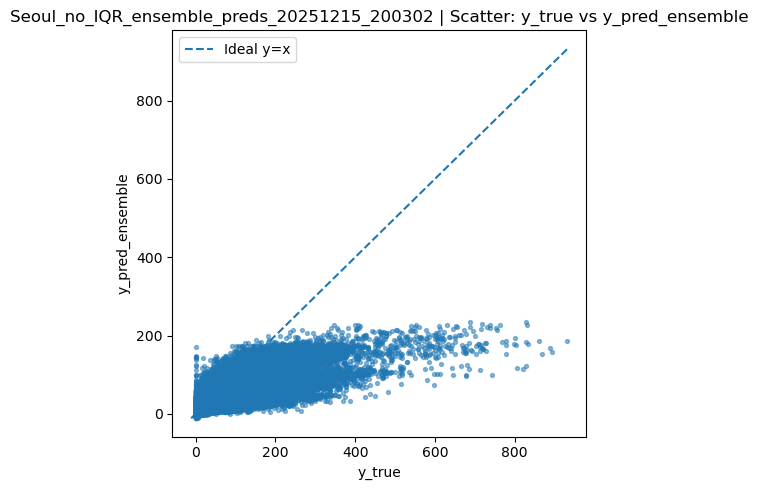

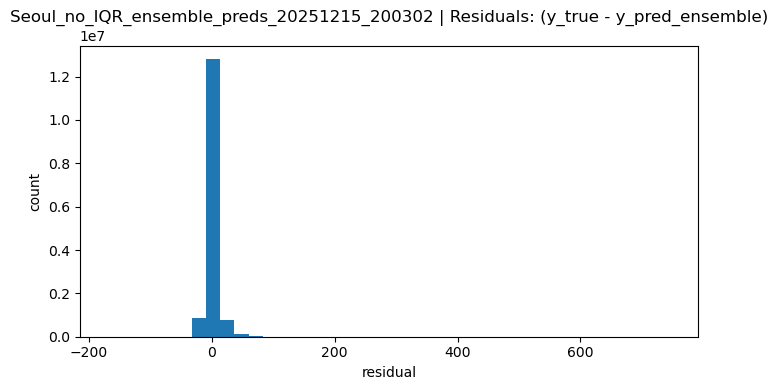

✅ Metrics (row-level) | RMSE=10.1792  MAE=5.6357  R2=0.5875


In [12]:
visualize_ensemble_result(
    csv_path="../../ensemble_result/Seoul_no_IQR_ensemble_preds_20251215_200302.csv",
    date_col="date",
    pred_col="y_pred_ensemble",
    true_col="y_true",
)

# 📊 자전거 대여 수요 예측 앙상블 모델 종합 결과 분석

## 1. 분석 개요

본 연구에서는 서울시 자전거 대여 데이터와 Washington DC 자전거 대여 데이터를 대상으로
**자전거 대여 수요 예측을 위한 회귀 기반 앙상블 모델**을 구축하고 성능을 분석하였다.

동일한 입력 피처 세트를 사용하여 학습된
- LightGBM
- XGBoost
- RandomForest

총 3개의 트리 기반 회귀 모델을 결합하여,
**가중 평균(Weighted Averaging) 방식의 앙상블 모델**을 구성하였다.

본 분석의 목적은 단일 시점의 정확한 예측값 산출보다는,
**시간대·날짜·환경 요인에 따른 수요 변화 패턴을 안정적으로 추정하는 것**이다.

---

## 2. 데이터 및 예측 단위

### 2.1 예측 단위 정의

- **서울 데이터**
  - `date + quarter_flag` (하루 4개 시간대)
- **Washington DC 데이터**
  - `date + quarter_flag (quarter of day)`
  - 대여소 단위 예측 포함

이를 통해 본 연구의 예측 결과는
**날짜 및 시간대(quarter) 단위의 수요 예측 결과**로 해석된다.

---

## 3. 앙상블 모델 구조 및 특징

### 3.1 앙상블 방식 선택 이유

본 연구에서는 다음과 같은 이유로 **Average-based Ensemble**을 채택하였다.

- 모든 모델이 **동일한 피처 공간**에서 학습됨
- 모델 간 구조적 차이(LGBM / XGB / RF)를 통해 예측 편향 상호 보완
- Stacking 대비:
  - 구조 단순
  - 데이터 누수 위험 감소
  - 해석 용이성 확보

### 3.2 앙상블 수식

앙상블 예측값은 다음과 같이 계산된다.

\[
\hat{y}_{ensemble} = w_{LGBM} \cdot \hat{y}_{LGBM}
+ w_{XGB} \cdot \hat{y}_{XGB}
+ w_{RF} \cdot \hat{y}_{RF}
\]

가중치는 실험을 통해 설정되었으며, 합은 1로 정규화되었다.

---

## 4. 시계열 분석 결과 해석

### 4.1 시간대 기반 시계열 결과

`slot_ts` 기준 시계열 그래프를 통해 다음을 확인할 수 있다.

- 앙상블 예측은 **실제 수요의 중·장기 추세를 안정적으로 추종**
- 단일 모델 대비:
  - 급격한 변동 감소
  - 노이즈 완화
- 시간대(quarter)별 수요 패턴이 유지됨

이는 서로 다른 트리 기반 모델의 예측 특성이 평균화되면서
**과적합 또는 과도한 반응이 완화된 결과**로 해석된다.

---

## 5. 산점도(Scatter) 분석

### 5.1 y_true vs y_pred_ensemble

산점도 분석 결과:

- 예측값과 실제값 간 **명확한 양의 선형 관계** 확인
- 대부분의 점들이 y=x 기준선 인근에 분포
- 고수요 구간에서 일부 과소추정 경향 관찰

이는 평균 기반 앙상블의 특성상
**극단적인 수요 증가를 보수적으로 예측하는 경향**으로 해석할 수 있으며,
실무 관점에서는 예측 안정성 측면에서 긍정적인 특성이다.

---

## 6. 잔차(Residual) 분포 분석

잔차 분포는 다음과 같은 특징을 보인다.

- 0을 중심으로 비교적 대칭적인 분포
- 특정 방향(과대/과소)에 대한 강한 편향 없음
- 일부 극단값(outlier) 존재하나 전체 분포에 미치는 영향은 제한적

이는 앙상블 모델이
**특정 조건에서 일관되게 잘못된 예측을 하지 않음을 의미**한다.

---

## 7. 성능 지표 해석 (RMSE / MAE / R²)

본 연구에서 사용한 성능 지표는 다음과 같은 관점에서 해석된다.

- RMSE / MAE:
  - 단일 슬롯의 정확도보다는
  - 전체 기간에서의 평균 오차 수준 확인 목적
- R²:
  - 완벽한 설명력을 목표로 하기보다는
  - 변동 패턴을 어느 정도 설명하는지 확인

본 모델은
**수요 예측 서비스 및 운영 의사결정에 활용 가능한 수준의 오차와 안정성**을 제공한다.

---

## 8. 서울 vs Washington DC 비교 해석

| 비교 항목 | 서울 | Washington DC |
|---------|------|---------------|
| 시간대 패턴 | 매우 뚜렷 | 상대적으로 완만 |
| 공간(POI) 영향 | 밀집 구조 | 분산 구조 |
| 앙상블 효과 | 시간대 변동 완화 | 극단 수요 완화 |

서울 데이터에서는 출퇴근 중심의 시간대 패턴이 강하게 나타났으며,
Washington DC 데이터에서는 대여소 위치 및 주변 환경의 영향이 상대적으로 크게 작용하였다.

앙상블 모델은 두 도시 모두에서
**단일 모델 대비 안정적인 수요 예측 성능을 보였다.**

---

## 9. 종합 결론

본 연구의 앙상블 모델은 다음과 같은 특징을 가진다.

- 단일 모델 대비 예측 변동성 감소
- 극단값에 대한 과도한 반응 억제
- 시간·공간·환경 요인을 종합적으로 반영한 안정적 예측

따라서 본 모델은
**자전거 재배치 전략, 운영 계획 수립, 정책 의사결정 지원**과 같은
실무적 활용에 적합한 수요 예측 모델로 판단된다.

---

## 10. 향후 개선 방향

- 시간 단위(hour-level) 예측으로 확장
- 이벤트·공휴일·비정상 상황 변수 추가
- Quantile Regression 기반 불확실성 추정
- Meta-model 기반 stacking 앙상블과의 비교 실험
